In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df1 = pd.read_csv('dataset/track1_round1_train_20210222.csv', header=None, names=['idx', 'context', 'label'])

In [24]:
df2 = pd.read_csv('dataset/track1_round1_testA_20210222.csv', header=None, names=['idx', 'context'])

将训练样本和测试样本连接起来探索数据的一些性质

In [25]:
df = pd.concat([df1[['idx', 'context']], df2])

In [26]:
df.shape

(13000, 2)

In [27]:
df.head(10)

,idx,context
0,0|,|623 328 538 382 399 400 478 842 698 137 492 2...
1,1|,|48 328 538 382 809 623 434 355 382 382 363 14...
2,2|,|623 656 293 851 636 842 698 493 338 266 369 6...
3,3|,|48 328 380 259 439 107 380 265 172 470 290 69...
4,4|,|623 328 399 698 493 338 266 14 177 415 511 64...
5,5|,|80 328 328 54 172 439 741 380 172 842 698 177...
6,6|,|48 322 795 856 374 439 48 328 443 380 597 172...
7,7|,|623 328 659 486 582 162 711 289 606 405 809 7...
8,8|,|852 328 471 585 117 458 399 607 693 380 522 6...
9,9|,|229 172 200 737 437 547 651 693 623 328 355 6...


拆分数据，去除首尾的分隔符（‘|’和‘ ’），再以空格分隔

In [28]:
df['words'] = df['context'].apply(lambda x: x.strip('|').strip().split(' '))

In [29]:
df.shape

(13000, 3)

In [18]:
from collections import Counter

统计各个词的数量和不同长度文本的数量

In [30]:
wordCounter = Counter()
lengthCounter = Counter()

In [31]:
for i in range(df.shape[0]):
    length = len(df['words'].iloc[i])
    lengthCounter[length] += 1
    for word in df['words'].iloc[i]:
        wordCounter[word] += 1

In [32]:
print('num of word: ', len(wordCounter))

num of word:  858


In [33]:
print('num of different length:', len(lengthCounter))

num of different length: 100


转换为list数据格式

In [35]:
lengthtuple = [item for item in lengthCounter.items()]

In [36]:
lengthtuple[0:5]

[(48, 218), (38, 312), (35, 350), (82, 35), (22, 211)]

排序，按文本长度排序

In [37]:
lengthtuple.sort(key=lambda x: x[0])

In [38]:
lengthtuple[0:5]

[(4, 2), (5, 9), (6, 11), (7, 20), (8, 31)]

将上一步得到的list，解压缩为两个序列，文本长度的list和数量的list, zip（）是压缩，zip（*）解压缩

In [39]:
lengthList, numList = zip(*lengthtuple)

In [40]:
lengthList[0:5]

(4, 5, 6, 7, 8)

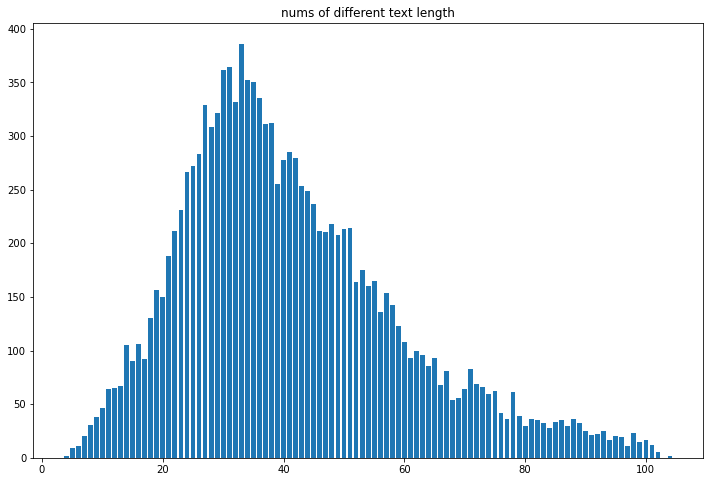

In [43]:
plt.figure(figsize=(12, 8))
plt.bar(x=lengthList, height=numList)
plt.title('nums of different text length')
plt.savefig('Length.png', dpi=400)
plt.show()

In [44]:
df['length'] = df['words'].apply(lambda x: len(x))

In [45]:
df['length'].describe()

count    13000.000000
mean        41.298231
std         18.206221
min          4.000000
25%         28.000000
50%         38.000000
75%         51.000000
max        104.000000
Name: length, dtype: float64

探索出现字的性质

In [46]:
wordTuples = [item for item in wordCounter.items()]

按出现次数排序

In [47]:
wordTuples.sort(key=lambda x: x[1])

In [48]:
wordTuples[0:10]

[('466', 78),
 ('236', 85),
 ('186', 86),
 ('82', 89),
 ('241', 90),
 ('708', 91),
 ('242', 92),
 ('467', 92),
 ('131', 92),
 ('451', 92)]

In [71]:
wordTuples[-10:]

[('266', 6907),
 ('623', 7148),
 ('809', 9323),
 ('381', 12750),
 ('177', 13352),
 ('415', 13502),
 ('380', 16313),
 ('698', 16551),
 ('328', 18975),
 ('693', 26282)]

In [49]:
wordList, wordNum = zip(*wordTuples)

In [50]:
len(wordList)

858

In [51]:
import numpy as np
wordSries = pd.Series(data=wordNum, index=wordList, name='word')

In [52]:
wordSries.shape

(858,)

In [53]:
wordSries.describe()

count      858.000000
mean       625.730769
std       1821.054338
min         78.000000
25%        117.000000
50%        139.000000
75%        357.750000
max      26282.000000
Name: word, dtype: float64

In [54]:
wordSries.iloc[0:10]

466    78
236    85
186    86
82     89
241    90
708    91
242    92
467    92
131    92
451    92
Name: word, dtype: int64

In [55]:
wordSries['23']

118

In [58]:
wordSries.iloc[-10:]

266     6907
623     7148
809     9323
381    12750
177    13352
415    13502
380    16313
698    16551
328    18975
693    26282
Name: word, dtype: int64

In [57]:
wordSries.iloc[857]

26282

可以看见最后这几个字出现次数远超其他，考虑是否要在字典中去除他们。

探索label的性质，label只出现在训练集中，即df1

Excel里面显示，数据当中有label为空的情况

In [72]:
df1['label'].iloc[1]

'|'

In [74]:
num = 0
for i in range(df1.shape[0]):
    if df1['label'].iloc[i] == '|':
        df1.loc['label', i] = '| -1'
        num += 1
print(f'没有标签，即正常的数据共：{num}例。')

没有标签，即正常的数据共：0例。


In [75]:
df1['labelList'] = df1['label'].apply(lambda x: x.strip('|').strip().split(' '))

In [76]:
df1['numLabelEachOne'] = df1['labelList'].apply(lambda x: len(x))
df1['numLabelEachOne'].describe()

count    10000.000000
mean         1.635000
std          1.298824
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: numLabelEachOne, dtype: float64

大部分的数据只有一个标签

In [77]:
labelCounter = Counter()
for i in range(df1.shape[0]):
    for label in df1['labelList'].iloc[i]:
        labelCounter[label] += 1

In [78]:
labelTuples = [item for item in labelCounter.items()]
labelTuples.sort(key=lambda x: int(x[0]))
labelList, numList = zip(*labelTuples)

In [79]:
len(labelList)
labelList[:5]

('-1', '0', '1', '2', '3')

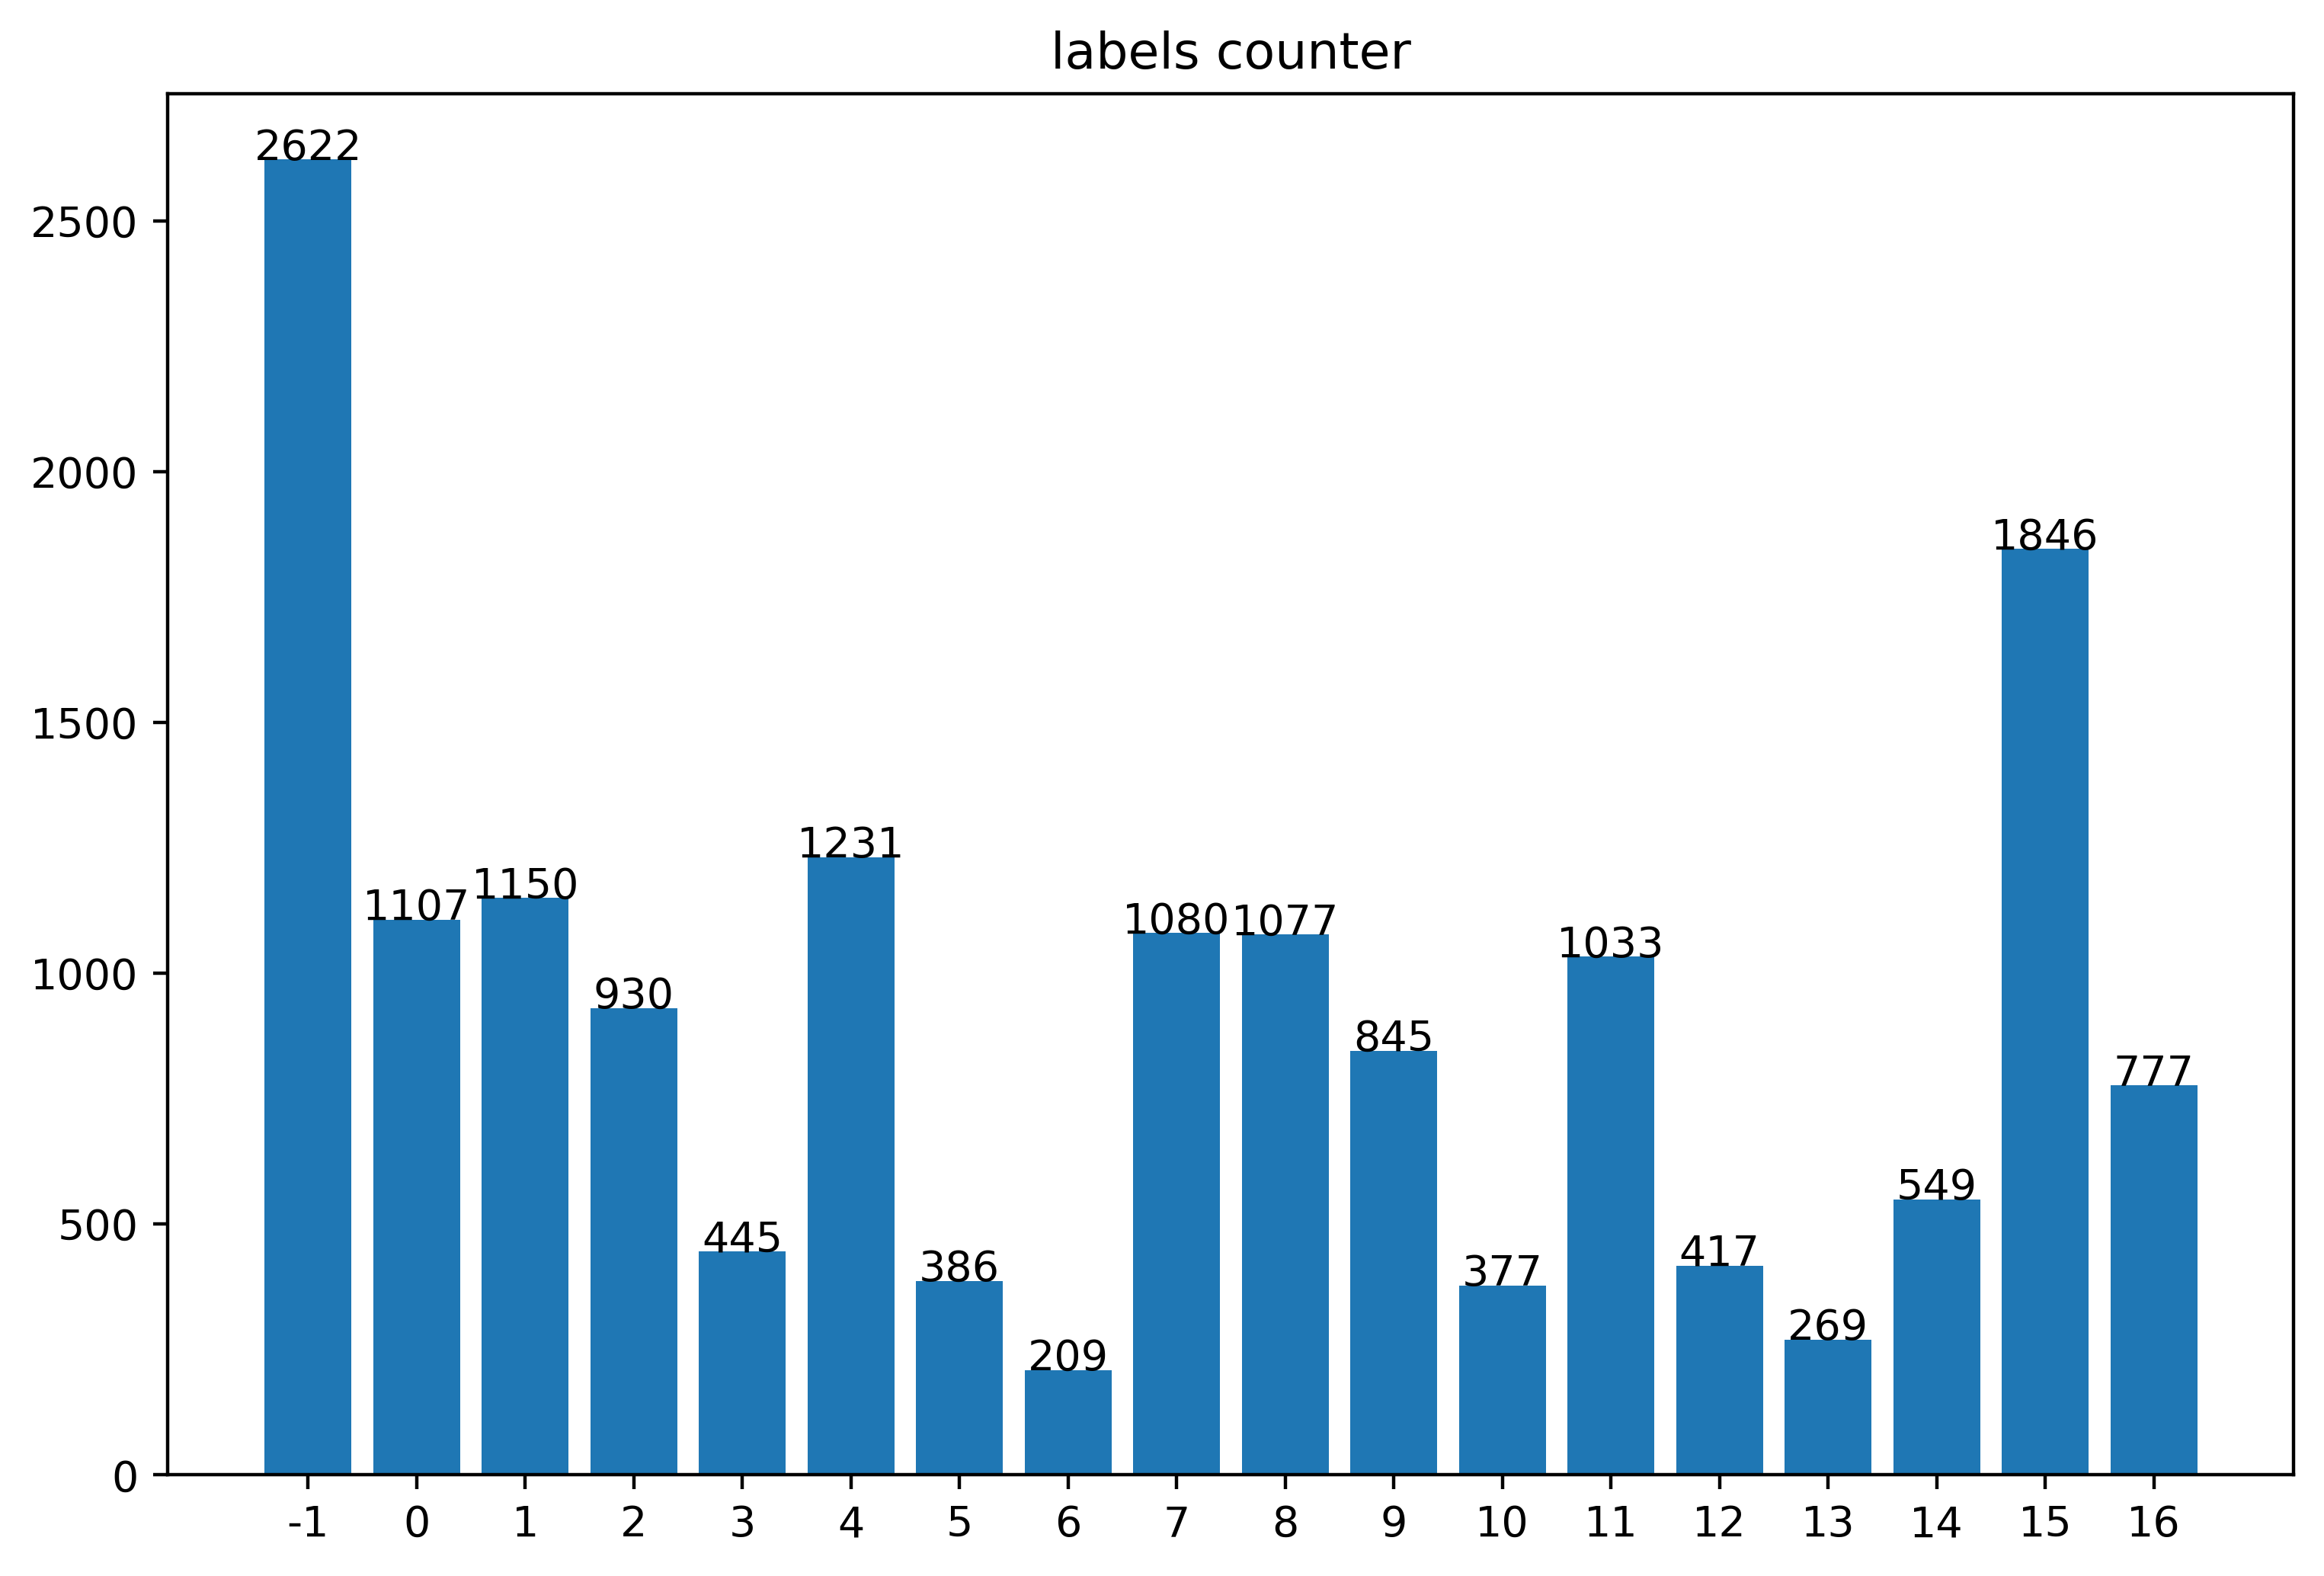

In [87]:
plt.figure(figsize=(9, 6), dpi=400)
plt.bar(x=labelList, height=numList)
for x, y in enumerate(numList):
    plt.text(x, y, '%d' % y, ha='center')
plt.title('labels counter')
plt.savefig('Labels.png', dpi=100)
plt.show()